In [1]:
import numpy as np
import xarray as xr

partx.npz

In [76]:
aa = np.load('../data/raw/neuropixels/steinmetz_part0.npz', allow_pickle=True)['dat'][0]
aa.keys()


dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])

In [90]:
aa['date_exp'], aa['mouse_name']

('2016-12-14', 'Cori')

In [78]:
cell_id = aa['cellid_orig']
cell_id.shape, cell_id.sum()

((1085,), 734)

In [93]:
np.unique(cell_id)

array([False,  True])

In [86]:
df.set_index('Cell').ilo

,Trial,SpikeTime
Cell,,
0,0,0.582053
0,0,0.823720
0,0,1.193487
0,0,1.469720
0,0,1.578720
...,...,...
1069,250,0.156016
1069,250,0.161983
1069,250,0.199949


In [87]:
cell_id.shape

(1085,)

lfp.npz

In [14]:
dat = np.load('../data/raw/lfp/steinmetz_lfp.npz', allow_pickle=True)['dat']
dd = dat[0]
len(dat), dd.keys()

(39, dict_keys(['lfp', 'lfp_passive', 'brain_area_lfp']))

In [16]:
dd['lfp'].shape

(7, 214, 250)

In [3]:
lfps = np.concatenate((dd['lfp'], dd['lfp_passive']), axis=1)
lfps.shape, dd['brain_area_lfp']

((7, 364, 250), ['ACA', 'LS', 'MOs', 'CA3', 'DG', 'SUB', 'VISp'])

### st.npz (a 2D array of lists...)

In [5]:
dat = np.load('../data/raw/lfp/steinmetz_st.npz', allow_pickle=True)['dat']
dd = dat[1]
len(dat), dd.keys()

(39, dict_keys(['ss', 'ss_passive']))

In [16]:
dd['ss'].shape, dd['ss'].dtype, dd['ss_passive'].shape, dd['ss_passive'].dtype

((1070, 251), dtype('O'), (1070, 150), dtype('O'))

In [22]:
import pandas as pd

In [26]:
rows = []

# Loop through each element
for neuron_id, neuron_data in enumerate(dd['ss']):
    for trial_id, trial_data in enumerate(neuron_data):
        for spike_time in trial_data:
            rows.append([neuron_id, trial_id, spike_time])

df = pd.DataFrame(rows, columns=['Cell', 'Trial', 'SpikeTime'])
df.sample(10)

,Cell,Trial,SpikeTime
787280,398,176,0.887535
576373,291,55,2.004822
657349,337,78,1.875254
1674443,903,42,0.910666
1653815,888,179,0.013966
1788352,974,102,0.554841
662261,338,87,0.402162
406174,192,149,0.585788
1123823,602,23,1.465023
1569336,858,238,2.014231


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015351 entries, 0 to 2015350
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Cell       int64  
 1   Trial      int64  
 2   SpikeTime  float32
dtypes: float32(1), int64(2)
memory usage: 38.4 MB


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015351 entries, 0 to 2015350
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Cell       int64  
 1   Trial      int64  
 2   SpikeTime  float32
dtypes: float32(1), int64(2)
memory usage: 38.4 MB


In [65]:
df.astype({'Cell': np.uint32, 'Trial': np.uint32}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015351 entries, 0 to 2015350
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Cell       uint32 
 1   Trial      uint32 
 2   SpikeTime  float32
dtypes: float32(1), uint32(2)
memory usage: 23.1 MB


In [60]:
2**32

4294967296

In [58]:
df.dtypes

Cell           int64
Trial          int64
SpikeTime    float32
dtype: object

In [39]:
df.set_index(['Cell', 'Trial']).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2015351 entries, (0, 0) to (1069, 250)
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   SpikeTime  float32
dtypes: float32(1)
memory usage: 15.4 MB


In [73]:
dd['ss'].shape

(1070, 251)

In [71]:
xr.DataArray(dd['ss'], )

ValueError: can only convert an array of size 1 to a Python scalar

<xarray.DataArray (dim_0: 1070, dim_1: 251)>
array([[array([0.58205324, 0.8237199 , 1.1934866 , 1.4697199 , 1.57872   ,
               1.6177199 , 1.9250866 , 1.9673532 , 2.3374865 , 2.3705866 ,
               2.4395533 , 2.46452   ], dtype=float32)                    ,
        array([1.2188604, 1.2337937, 1.3258604, 1.534927 , 1.868527 , 1.8926604,
               2.068627 , 2.0853603, 2.2547936], dtype=float32)                 ,
        array([0.38471276, 0.5493128 , 0.6497461 , 0.6944461 , 0.7444794 ,
               0.89871275, 1.0920461 , 1.1577461 , 1.2860461 , 1.538246  ,
               1.6479794 , 1.7653128 , 1.7861794 , 2.073946  , 2.134846  ],
              dtype=float32)                                               ,
        ...,
        array([0.00409056, 0.21425723, 0.6319239 , 0.90255725, 1.1862905 ,
               1.2066572 , 1.2716906 , 1.3581905 , 1.5131905 , 1.5439906 ,
               2.0124905 , 2.0671573 , 2.2341573 ], dtype=float32)        ,
        array([0.9253645

In [42]:
ds = xr.Dataset.from_dataframe(df.set_index(['Cell', 'Trial'], append=True), sparse=True)
ds

Format,coo
Data Type,float32
Shape,"(2015351, 1067, 251)"
nnz,2015351
Density,3.7338929194188567e-06
Read-only,True
Size,30.8M
Storage ratio,0.0


In [50]:
ds['SpikeTime'].todense

AttributeError: 'DataArray' object has no attribute 'todense'

In [57]:
df.set_index(['Trial', 'Cell']).to_csv('st.csv')
df.set_index(['Trial', 'Cell']).to_parquet('st.parquet')

In [29]:
lfps = np.concatenate((dd['lfp'], dd['lfp_passive']), axis=1)
lfps.shape, dd['brain_area_lfp']

((4, 401, 250), ['CA1', 'VISl', 'POST', 'VISpm'])

## wav.npz

In [4]:
import numpy as np

In [5]:
dat = np.load('../data/raw/lfp/steinmetz_wav.npz', allow_pickle=True)['dat']
dd = dat[0]
len(dat), dd.keys()

(39, dict_keys(['waveform_w', 'waveform_u', 'trough_to_peak']))

In [6]:
dd['waveform_w'].shape,  dd['waveform_u'].shape, dd['trough_to_peak'].shape

((734, 82, 3), (734, 3, 384), (734,))

In [96]:
aa['spks'].shape

(734, 214, 250)

In [8]:
import matplotlib.pyplot as plt

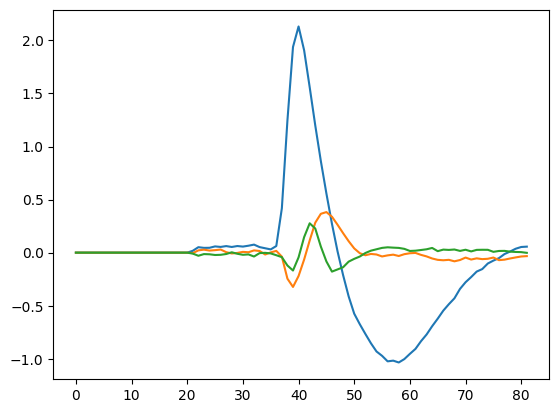

In [13]:
plt.plot(dd['waveform_w'][0])